<a href="https://colab.research.google.com/github/Keerthana22-elango/Machine_learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Model
Mean Squared Error: 33805466.898688614
R^2 Score: 0.7694415927057693


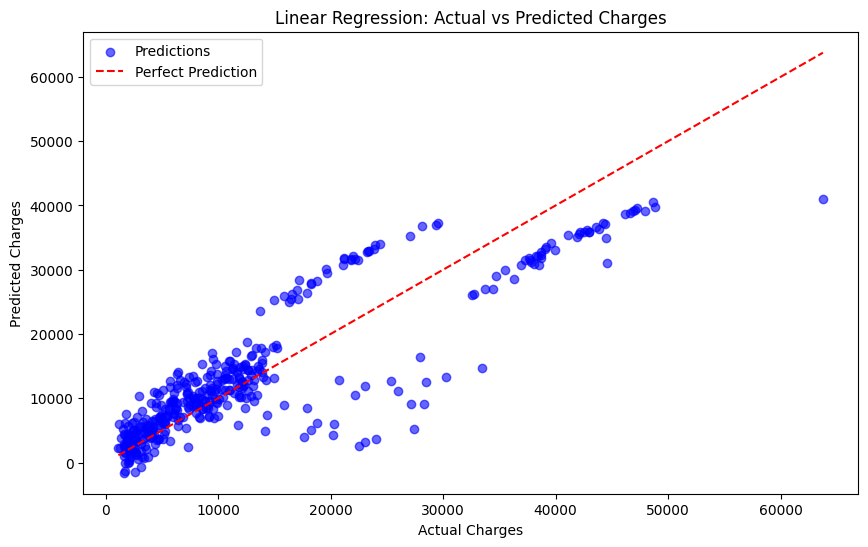

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
for column in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    insurance_data[column] = le.fit_transform(insurance_data[column])
    label_encoders[column] = le

# Separate features and target variable
X = insurance_data.drop(columns=['charges'])
y = insurance_data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions and calculate performance metrics
y_pred = linear_regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results summary
print("Linear Regression Model")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plot Predicted vs Actual Charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")  # Line of perfect prediction
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Linear Regression: Actual vs Predicted Charges")
plt.legend()
plt.show()
